# Project: Wrangling and Analyze Data

This aim of this project is to gather different datasets related to the WeRateDogs tweets and analyze the data accordingly. These efforts have been divided into three parts:
* [Gathering the Data](#data-gathering)
* [Assessing the Data](#data-assessing)
* [Cleaning the Data](#data-cleaning)
* [Storing the Data](#data-storing)
* [Analyzing and Visualizing the Data](#data-analysis)

In [1]:
# import the necessary python packages
import json
import os
from timeit import default_timer as timer

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import tweepy
from bs4 import BeautifulSoup

%matplotlib inline

In [2]:
consumer_key = os.getenv("API_KEY")
consumer_secret = os.getenv("API_KEY_SECRET")
access_token = os.getenv("ACCESS_TOKEN")
access_secret = os.getenv("ACCESS_TOKEN_SECRET")

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

## Gathering the Data <a class="anchor" id="data-gathering"></a>


1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
# load WeRateDogs Archive data from csv file
twitter_df = pd.read_csv("twitter-archive-enhanced.csv")
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# load image prediction data from the url provided in the course
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open (url.split('/')[-1], mode = 'wb') as f:
    f.write(response.content)

# read the file into a pandas dataframe
image_df = pd.read_csv("image-predictions.tsv", sep = '\t')
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
# iterate throught the twitter dataset to get each tweet id
for _, item in twitter_df.iterrows():
    try:
        start = timer()
        tweet_id = item['tweet_id']

        # get additional data from twitter api
        tweet = api.get_status(tweet_id, tweet_mode='extended')

        # write data to tweet_json.txt file
        file_name = 'tweet_json.txt'
        if os.path.exists(file_name):
            with open (file_name, mode = 'a') as f:
                f.write(json.dumps(tweet._json) + '\n')
        else:
            with open (file_name, mode = 'wt') as f:
                f.write(json.dumps(tweet._json) + '\n')
        print(tweet_id)
        end = timer()
        print(end-start)
    except Exception as e:
        print(e)
        

892420643555336193
1.0633197
892177421306343426
0.8201952000000006
891815181378084864
0.9093768000000004
891689557279858688
0.8045589
891327558926688256
0.8955355000000003
891087950875897856
0.9407519999999998
890971913173991426
0.915053799999999
890729181411237888
0.798225200000001
890609185150312448
0.8498184000000002
890240255349198849
0.9048115999999986
890006608113172480
1.0266510999999987
889880896479866881
0.9205141000000001
889665388333682689
0.8448111000000011
889638837579907072
1.2384049000000008
889531135344209921
1.245950299999997
889278841981685760
0.8235805999999997
888917238123831296
0.9793030999999992
888804989199671297
0.9172502999999992
888554962724278272
0.8427450000000007
404 Not Found
144 - No status found with that ID.
888078434458587136
0.8104659000000005
887705289381826560
0.8987834000000028
887517139158093824
0.8738826999999993
887473957103951883
0.7885063999999993
887343217045368832
0.8546232000000025
887101392804085760
0.8963591000000015
886983233522544640
0.

Rate limit reached. Sleeping for: 78


758740312047005698
80.21275890000004
758474966123810816
1.2154983000000357
758467244762497024
0.9334203999999318
758405701903519748
0.8702183999999988
758355060040593408
0.8708489000000554
758099635764359168
1.12702969999998
758041019896193024
0.8806608999999526
757741869644341248
1.2480646999999863
757729163776290825
0.9910015000000385
757725642876129280
1.3804795999999442
757611664640446465
1.1164750000000367
757597904299253760
0.9174937000000227
757596066325864448
0.9322604000000183
757400162377592832
0.9268131999999696
757393109802180609
0.7488737000001038
757354760399941633
0.7769481000000269
756998049151549440
0.8096881000000167
756939218950160384
0.8196093000000246
756651752796094464
0.9276780000000144
756526248105566208
1.0262531999999283
756303284449767430
0.8233474999999544
756288534030475264
0.8916398999999728
756275833623502848
0.9157026999999971
755955933503782912
1.057017099999939
755206590534418437
0.9071616999999605
755110668769038337
1.0017939000000524
7548748415939706

Rate limit reached. Sleeping for: 78


676975532580409345
80.03741679999985
676957860086095872
0.8860506000000896
676949632774234114
0.8101200000000972
676948236477857792
0.6896576999999979
676946864479084545
0.8439460999998118
676942428000112642
0.9140027000000828
676936541936185344
1.008268199999975
676916996760600576
0.8314185000001544
676897532954456065
0.9299338999999236
676864501615042560
0.9193659000000025
676821958043033607
0.9470068999999057
676819651066732545
0.8239105000000109
676811746707918848
0.8865817000000789
676776431406465024
0.9290625000001
676617503762681856
0.8118105000000924
676613908052996102
0.8132634999999482
676606785097199616
0.8161420999999791
676603393314578432
0.9516465000001517
676593408224403456
0.8170308999999634
676590572941893632
1.025776199999882
676588346097852417
0.7136657999999443
676582956622721024
0.8976184999999077
676575501977128964
0.9283909999999196
[Errno 13] Permission denied: 'tweet_json.txt'
676496375194980353
0.859575599999971
676470639084101634
1.369736100000182
67644000757

In [6]:
tweets = []

# read data from tweet_json.txt file to a list of dictionaries
with open('tweet_json.txt','r') as file:
    for line in file:
        # convert json strings to dictionaries
        data = json.loads(line)
        # append the dictionaries to the tweets list
        tweets.append({k:v for (k,v) in data.items() if k in ('id','retweet_count','favorite_count')})

print(tweets[0])

{'id': 892420643555336193, 'retweet_count': 7043, 'favorite_count': 33870}


In [7]:
# write the list of dictionaries to a dataframe
tweepy_df = pd.DataFrame(tweets)
tweepy_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,7043,33870
1,892177421306343426,5317,29389
2,891815181378084864,3498,22106
3,891689557279858688,7253,37002
4,891327558926688256,7794,35382


In [8]:
tweepy_df.rename({'id':'tweet_id'}, axis=1, inplace=True)
tweepy_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7043,33870
1,892177421306343426,5317,29389
2,891815181378084864,3498,22106
3,891689557279858688,7253,37002
4,891327558926688256,7794,35382


## Assessing the Data <a class="anchor" id="data-assessing"></a>

### Assesing the datasets visually

In [9]:
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [10]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [11]:
tweepy_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7043,33870
1,892177421306343426,5317,29389
2,891815181378084864,3498,22106
3,891689557279858688,7253,37002
4,891327558926688256,7794,35382
...,...,...,...
2313,666049248165822465,37,89
2314,666044226329800704,115,247
2315,666033412701032449,36,100
2316,666029285002620928,39,112


Scrolling through the three datasets, the following quality issues can be observed:
* `twitter_df`: 
    * About 5 columns (`in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id` and `retweeted_status_timestamp`) seem t have completely null values
    * The `source` column still carries the html anchor tag instead of just the url
    * The `name` column contains wrong names for some of the dogs. An example is the record in index `2352`
    * Some other columns asides the ones listed above are null but instead of `NaN`, we have 'None'. This might make working with null data difficult as we continue our analysis
* `image_df`:
    * the case of the predictions is not consistent. Some are lower case while some others are title case


As for tidiness, the `twitter_df` and `tweepy_df` have more rows than the `image_df`. This means some tweets don't have image predictions and might have to be dropped. Also, the `twitter_df` contains both information about the tweets and the type of dog. The type of dog should be contained in a separate dataset. 

### Assessing the datasets programmatically

In [12]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
twitter_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
751,779056095788752897,NaN,NaN,2016-09-22 20:33:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everybody drop what you're doing and look at t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/779056095...,13,10,None,None,None,None,None
508,812503143955202048,NaN,NaN,2016-12-24 03:40:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I'm happy to inform you all that Jake is in ex...,NaN,NaN,NaN,https://m.facebook.com/story.php?story_fbid=18...,13,10,None,None,None,None,None
1929,674042553264685056,NaN,NaN,2015-12-08 01:47:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yea I can't handle the cuteness anymore. Curls...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674042553...,12,10,None,None,None,None,None
1153,725729321944506368,NaN,NaN,2016-04-28 16:52:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. She's a Butternut Splishnsplash....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/725729321...,12,10,Lola,None,None,None,None
701,786051337297522688,7.727430e+17,7.305050e+17,2016-10-12 03:50:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10 for breakdancing puppo @shibbnbot,NaN,NaN,NaN,NaN,13,10,None,None,None,None,puppo
88,875097192612077568,NaN,NaN,2017-06-14 21:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You'll get your package when that precious man...,NaN,NaN,NaN,https://twitter.com/drboondoc/status/874413398...,13,10,None,None,None,None,None
1799,677187300187611136,NaN,NaN,2015-12-16 18:03:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see a Byzantine Rigatoni. Very aerodyn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677187300...,9,10,None,None,None,None,None
472,816450570814898180,NaN,NaN,2017-01-04 01:05:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Moose. He doesn't want his friend to go b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/816450570...,13,10,Moose,None,None,None,None
384,826958653328592898,NaN,NaN,2017-02-02 01:01:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Loki. He smiles like Elvis. Ain't noth...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/826958653...,12,10,Loki,doggo,None,None,None
820,770414278348247044,NaN,NaN,2016-08-30 00:14:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Al Cabone. He's a gangsta puppa. Rather h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770414278...,11,10,Al,None,None,None,None


In [14]:
twitter_df[['text','name']].sample(10)

,text,name
2237,This lil pup is Oliver. Hops around. Has wings...,None
2279,This is Biden. Biden just tripped... 7/10 http...,Biden
373,"This is Beebop. Her name means ""Good Dog"" in r...",Beebop
950,This is Brody. He's a lifeguard. Always prepar...,Brody
1560,This pupper is sprouting a flower out of her h...,None
248,Say hello to Mimosa. She's an emotional suppor...,Mimosa
1589,This is Mona. She's a Yarborough Splishnsplash...,Mona
1096,This is Rory. He's extremely impatient. 11/10 ...,Rory
398,Say hello to Pablo. He's one gorgeous puppo. A...,Pablo
896,Meet Toby. He has a drinking problem. Inflatab...,Toby


In [15]:
twitter_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [16]:
twitter_df[twitter_df['retweeted_status_id'].notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [17]:
twitter_df[twitter_df['in_reply_to_status_id'].notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [18]:
twitter_df.describe(include='all')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
count,2.356000e+03,7.800000e+01,7.800000e+01,2356,2356,2356,1.810000e+02,1.810000e+02,181,2297,2356.000000,2356.000000,2356,2356,2356,2356,2356
unique,NaN,NaN,NaN,2356,4,2356,NaN,NaN,181,2218,NaN,NaN,957,2,2,2,2
top,NaN,NaN,NaN,2016-09-01 00:04:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,2015-12-08 18:17:56 +0000,https://twitter.com/dog_rates/status/809920764...,NaN,NaN,None,None,None,None,None
freq,NaN,NaN,NaN,1,2221,1,NaN,NaN,1,2,NaN,NaN,745,2259,2346,2099,2326
mean,7.427716e+17,7.455079e+17,2.014171e+16,NaN,NaN,NaN,7.720400e+17,1.241698e+16,NaN,NaN,13.126486,10.455433,NaN,NaN,NaN,NaN,NaN
std,6.856705e+16,7.582492e+16,1.252797e+17,NaN,NaN,NaN,6.236928e+16,9.599254e+16,NaN,NaN,45.876648,6.745237,NaN,NaN,NaN,NaN,NaN
min,6.660209e+17,6.658147e+17,1.185634e+07,NaN,NaN,NaN,6.661041e+17,7.832140e+05,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,6.783989e+17,6.757419e+17,3.086374e+08,NaN,NaN,NaN,7.186315e+17,4.196984e+09,NaN,NaN,10.000000,10.000000,NaN,NaN,NaN,NaN,NaN
50%,7.196279e+17,7.038708e+17,4.196984e+09,NaN,NaN,NaN,7.804657e+17,4.196984e+09,NaN,NaN,11.000000,10.000000,NaN,NaN,NaN,NaN,NaN
75%,7.993373e+17,8.257804e+17,4.196984e+09,NaN,NaN,NaN,8.203146e+17,4.196984e+09,NaN,NaN,12.000000,10.000000,NaN,NaN,NaN,NaN,NaN


In [19]:
twitter_df.duplicated().sum()

0

In [20]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1071,716439118184652801,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1058,714957620017307648,https://pbs.twimg.com/media/CewKKiOWwAIe3pR.jpg,1,Great_Pyrenees,0.251516,True,Samoyed,0.139346,True,kuvasz,0.129005,True
783,690015576308211712,https://pbs.twimg.com/media/CZNtgWhWkAAbq3W.jpg,2,malamute,0.949609,True,Siberian_husky,0.033084,True,Eskimo_dog,0.016663,True
257,670778058496974848,https://pbs.twimg.com/media/CU8VFhuVAAAQW8B.jpg,1,pug,0.776612,True,Brabancon_griffon,0.112032,True,boxer,0.039051,True
1331,757611664640446465,https://pbs.twimg.com/media/CoOTyXJXEAAtjs9.jpg,1,bluetick,0.829259,True,beagle,0.145358,True,Walker_hound,0.019595,True
1647,808733504066486276,https://pbs.twimg.com/media/Czky0v9VIAEXRkd.jpg,1,seat_belt,0.779137,False,toy_poodle,0.036927,True,golden_retriever,0.016972,True
1845,838921590096166913,https://pbs.twimg.com/media/C6Ryuf7UoAAFX4a.jpg,1,Border_terrier,0.664538,True,Brabancon_griffon,0.170451,True,Yorkshire_terrier,0.087824,True
434,674372068062928900,https://pbs.twimg.com/media/CVvZ0KTWwAAdXKV.jpg,1,seashore,0.346126,False,American_alligator,0.106404,False,sandbar,0.049349,False
188,669371483794317312,https://pbs.twimg.com/media/CUoVz8rU8AAfW-c.jpg,1,Brabancon_griffon,0.483268,True,miniature_pinscher,0.307465,True,redbone,0.070524,True
161,668932921458302977,https://pbs.twimg.com/media/CUiG6_ZXAAAPaw_.jpg,1,standard_poodle,0.237638,True,Old_English_sheepdog,0.195573,True,toy_poodle,0.144658,True


In [22]:
image_df.describe(include='all')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
count,2.075000e+03,2075,2075.000000,2075,2075.000000,2075,2075,2.075000e+03,2075,2075,2.075000e+03,2075
unique,NaN,2009,NaN,378,NaN,2,405,NaN,2,408,NaN,2
top,NaN,https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg,NaN,golden_retriever,NaN,True,Labrador_retriever,NaN,True,Labrador_retriever,NaN,True
freq,NaN,2,NaN,150,NaN,1532,104,NaN,1553,79,NaN,1499
mean,7.384514e+17,NaN,1.203855,NaN,0.594548,NaN,NaN,1.345886e-01,NaN,NaN,6.032417e-02,NaN
std,6.785203e+16,NaN,0.561875,NaN,0.271174,NaN,NaN,1.006657e-01,NaN,NaN,5.090593e-02,NaN
min,6.660209e+17,NaN,1.000000,NaN,0.044333,NaN,NaN,1.011300e-08,NaN,NaN,1.740170e-10,NaN
25%,6.764835e+17,NaN,1.000000,NaN,0.364412,NaN,NaN,5.388625e-02,NaN,NaN,1.622240e-02,NaN
50%,7.119988e+17,NaN,1.000000,NaN,0.588230,NaN,NaN,1.181810e-01,NaN,NaN,4.944380e-02,NaN
75%,7.932034e+17,NaN,1.000000,NaN,0.843855,NaN,NaN,1.955655e-01,NaN,NaN,9.180755e-02,NaN


In [23]:
image_df.duplicated().sum()

0

In [24]:
tweepy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2318 non-null   int64
 1   retweet_count   2318 non-null   int64
 2   favorite_count  2318 non-null   int64
dtypes: int64(3)
memory usage: 54.5 KB


In [25]:
tweepy_df.sample(10)

,tweet_id,retweet_count,favorite_count
368,826615380357632002,3702,0
690,784826020293709826,3025,9598
2019,671357843010908160,133,351
1345,701570477911896070,848,2592
718,780800785462489090,1205,5209
73,878316110768087041,5551,0
251,842115215311396866,2773,13072
1369,699413908797464576,577,1934
1188,714631576617938945,903,3028
1828,675354435921575936,14957,29563


In [26]:
tweepy_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.318000e+03,2318.000000,2318.000000
mean,7.418983e+17,2479.464193,7085.255824
std,6.828371e+16,4198.240553,11003.241603
min,6.660209e+17,1.000000,0.000000
25%,6.780814e+17,499.000000,1224.750000
50%,7.182408e+17,1157.000000,3062.500000
75%,7.986802e+17,2876.250000,8661.000000
max,8.924206e+17,71024.000000,145219.000000


In [27]:
tweepy_df.duplicated().sum()

0

Assessing the datasets programmatically, the following quality issues can be highlighted from the `twitter_df`:
* the 5 columns mentioned earlier are not completely null but about 90% of the records are null.
* The `source` column carries the html anchor tag instead of just the tweet source.
* pandas does not recognize the missing values in the `doggo, floofer, pupper` and `puppo` columns because 'None' is used instead of `NaN`.
* the records with non-null values in the `retweeted_status_id, retweeted_status_user_id` and `retweeted_status_timestamp` columns seem to be retweets and not original tweets.
* The `timestamp` and `retweeted_status_timestamp` columns have their datatypes as `object` rather than `datetime64[ns]`.
* The `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id` and `retweeted_status_user_id` columns have their datatypes as `float64` rather than `int64`.

### In summary, the following data cleaning issues have been identified after assessing the data:
#### Quality Issues

1. The records with non-null values in the `retweeted_status_id, retweeted_status_user_id` and `retweeted_status_timestamp` columns are retweets and not original tweets.
2. The records with non-null values in the `in_reply_to_status_id` and `in_reply_to_user_id` columns are replies and not original tweets.
3. The `source` column carries the html anchor tag instead of just the tweet source.
4. The `name` column contains wrong names for some of the dogs. An example is the record in index `2352`.
5. Some other columns asides the ones listed above are null but instead of `NaN`, we have 'None'. This will make working with null data difficult as we continue our analysis.
6. The `timestamp` and `retweeted_status_timestamp` columns have their datatypes as `object` rather than `datetime64[ns]`.
7. Only about 10% of the records in the `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` columns are not null.
8. The case of the image predictions is not consistent. Some are lower case while some others are title case.

#### Tidiness Issues
1. The `twitter_df` and `tweepy_df` have more rows than the `image_df`. This means some tweets don't have image predictions and might have to be dropped.
2. The `retweet_count` and `favorite_count` columns from the `tweepy_df` should be in the `twitter_df` instead.
3. The dog type should be contained in a single column in the `twitter_df` instead of being spread across multiple columns.
4. The image predictions from the `image_df` for each tweet should be merged with the main `twitter_df` in order to form a master df.


## Cleaning Data <a class="anchor" id="data-cleaning"></a>
In this section, clean **all** of the issues you documented while assessing. 

In [28]:
# make copies of original pieces of data
twitter_clean = twitter_df.copy()
image_clean = image_df.copy()
tweepy_clean = tweepy_df.copy()

### Tidiness Issue #1 - All tweets should have image predictions
#### Define
Drop tweets that have no image predictions
#### Code

In [29]:
# write the tweet ids in the twitter_clean dataset to a list
twitter_ids = twitter_clean.tweet_id.to_list()

# write the tweet ids in the image_clean dataset to a list
image_ids = image_clean.tweet_id.to_list()

# get the list of ids with no image prediction
no_pred = list(set(twitter_ids) - set(image_ids))

# drop tweets in the twitter_clean dataset with no image predictions
twitter_clean = twitter_clean[~twitter_clean['tweet_id'].isin(no_pred)]

#### Test

In [30]:
print(len(twitter_clean.tweet_id.to_list()))
print(len(image_clean.tweet_id.to_list()))

2075
2075


### Tidiness Issue #2 - Favorite and retweet counts in different datasets
#### Define
Merge the `twitter_clean` and `tweepy_clean` datasets
#### Code

In [31]:
# merge both datasets
twitter_clean = twitter_clean.merge(tweepy_clean, on='tweet_id', how='left')

#### Test

In [32]:
twitter_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count'],
      dtype='object')

### Tidiness Issue #3 - Dog type in multiple columns instead of one
#### Define
Melt the different dog type columns into one
#### Code

In [33]:
twitter_clean = pd.melt(twitter_clean, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'retweet_count', 'favorite_count'], value_vars=['doggo','floofer','pupper','puppo'], var_name= 'dog_type')
twitter_clean = twitter_clean[twitter_clean.value != 'None']
twitter_clean.drop('value', axis = 1, inplace=True)

### Tidiness Issue #4 - Image predictions in different datasets
#### Define
Add the image prediction from the `image_clean` dataset to the main `twitter_clean` dataset. We will be picking the first predictions
#### Code

In [34]:
# create a new dataframe containing just the records with the first predictions and where the predictions were actually dogs
breed_df = image_clean.query('p1_dog == True')[['tweet_id','p1']].rename(columns={'p1':'breed'})
# merge the breed_df with the twitter_clean dataset
twitter_clean = twitter_clean.merge(breed_df, on='tweet_id', how='left')


#### Test

In [35]:
twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_type,breed
0,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,6123.0,28012.0,doggo,Pembroke
1,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,2514.0,17983.0,doggo,German_shepherd
2,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,4583.0,24136.0,doggo,Labrador_retriever
3,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,2962.0,17932.0,doggo,komondor
4,869596645499047938,NaN,NaN,2017-05-30 16:49:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,2650.0,14246.0,doggo,Chihuahua


### Quality Issue #1 & #2 Select only original tweets

#### Define
Drop the records with non-null values in the `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id` and `retweeted_status_timestamp` columns of the `twitter_df` since those records are not original tweets.


#### Code

In [36]:
twitter_clean = twitter_clean[twitter_clean['retweeted_status_id'].isnull()]
twitter_clean = twitter_clean[twitter_clean['in_reply_to_status_id'].isnull()]

#### Test

In [37]:
twitter_clean[['retweeted_status_id','in_reply_to_status_id']].notna().sum()

retweeted_status_id      0
in_reply_to_status_id    0
dtype: int64

### Quality Issue #3 Anchor Tags in `source` column

#### Define

Extract the tweet source from the html anchor tags in the `source` column of the `twitter_df` using beautifulsoup


#### Code

In [38]:
# define a function to extract the text from the anchor tag using beautifulsoup library
def get_text(tag):
    text = BeautifulSoup(tag, "html.parser").get_text()
    return text

In [39]:
# apply the function to the source column in the dataframe
twitter_clean['source'] = twitter_clean.source.apply(get_text)

#### Test

In [40]:
twitter_clean.source.head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

### Quality Issue #4 wrong dog names

#### Define
Replace 'a' with `Nan` in the `name` column since the names of the dogs are missing for such records.

#### Code

In [41]:
twitter_clean['name'] = twitter_clean['name'].mask(twitter_clean['name'] == 'a',np.nan)

#### Test

In [42]:
twitter_clean.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_type,breed
329,752519690950500352,NaN,NaN,2016-07-11 15:07:30 +0000,Twitter for iPhone,Hopefully this puppo on a swing will help get ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/752519690...,11,10,None,3176.0,6878.0,puppo,NaN
330,751132876104687617,NaN,NaN,2016-07-07 19:16:47 +0000,Twitter for iPhone,This is Cooper. He's just so damn happy. 10/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751132876...,10,10,Cooper,1192.0,4745.0,puppo,Labrador_retriever
331,744995568523612160,NaN,NaN,2016-06-20 20:49:19 +0000,Twitter for iPhone,This is Abby. She got her face stuck in a glas...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744995568...,9,10,Abby,570.0,2758.0,puppo,Old_English_sheepdog
332,743253157753532416,NaN,NaN,2016-06-16 01:25:36 +0000,Twitter for iPhone,This is Kilo. He cannot reach the snackum. Nif...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743253157...,10,10,Kilo,1129.0,3939.0,puppo,malamute
333,738537504001953792,NaN,NaN,2016-06-03 01:07:16 +0000,Twitter for iPhone,This is Bayley. She fell asleep trying to esca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/738537504...,11,10,Bayley,1405.0,4723.0,puppo,chow


### Quality Issue #5 wrongly represented missing values

#### Define

Replace 'None' with `Nan` in all the name column.

#### Code

In [43]:
twitter_clean['name'] = twitter_clean['name'].mask(twitter_clean['name'] == 'None',np.nan)

#### Test

In [44]:
twitter_clean.query('name == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_type,breed


### Quality Issue #6 wrong datatypes

#### Define
Change the datatypes of the `timestamp` and `retweeted_status_timestamp` columns from `object` to `datetime64[ns]`

#### Code

In [45]:
# write the names of columns to be changed into a list
date_cols = ['timestamp','retweeted_status_timestamp']

# iterate through the list and convert the datatypes to datetime
for col in date_cols:
    twitter_clean[col] = pd.to_datetime(twitter_clean[col])

#### Test

In [46]:
twitter_clean[date_cols].dtypes

timestamp                     datetime64[ns, UTC]
retweeted_status_timestamp         datetime64[ns]
dtype: object

### Quality Issue #7 drop irrelevant columns

#### Define
Drop the `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` columns since they contain only null values

#### Code

In [47]:
twitter_clean.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],inplace= True)

#### Test

In [48]:
twitter_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'retweet_count',
       'favorite_count', 'dog_type', 'breed'],
      dtype='object')

### Quality Issue #8 inconsistent case

#### Define
Change the image predictions in the `breed` column of the `twitter_clean` df to lower case

#### Code

In [49]:
twitter_clean['breed'] = twitter_clean['breed'].str.lower()

#### Test

In [50]:
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_type,breed
0,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,6123.0,28012.0,doggo,pembroke
1,884162670584377345,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,2514.0,17983.0,doggo,german_shepherd
2,872967104147763200,2017-06-09 00:02:31+00:00,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,NaN,4583.0,24136.0,doggo,labrador_retriever
3,871515927908634625,2017-06-04 23:56:03+00:00,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,2962.0,17932.0,doggo,komondor
4,869596645499047938,2017-05-30 16:49:31+00:00,Twitter for iPhone,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,2650.0,14246.0,doggo,chihuahua


## Storing the Data <a class="anchor" id="data-storing"></a>
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv" as well as the other smaller datasets.

In [51]:
# create a directory for the data folder
os.makedirs('data', exist_ok=True) 

# save datasets in the data folder
twitter_clean.to_csv('data/twitter_archive_master.csv', index=False)

## Analyzing and Visualizing the Data <a class="anchor" id="data-analysis"></a>

In this section, we will be analyzing the data that has been assessed and cleaned. The twitter_archive_master dataset contains data about dogs and their ratings as gathered from the WeRateDogs twitter archive.
To do this, we will be answering the following questions:
* Is the rating correlated to the retweet or favorite count?
* Which dog type has the highest retweet or favorite count?
* Which dog breed has the highest retweet or favorite count?
* Which dog type has the highest favorite count?

In [52]:
# define a function to compute the correlation between two variables and plot a scatter plot
def find_correlation(df, col_1, col_2):
    corr = df[col_1].corr(df[col_2])
    name_1 = ' '.join(str(col_1).split('_'))
    name_2 = ' '.join(str(col_2).split('_'))
    print(f'Correlation between {name_1} and {name_2}: {corr}')
    sns.set(rc = {'figure.figsize':(15,8)})
    sns.scatterplot(data=df, x=col_1, y=col_2)
    plt.title(f"scatterplot showing relationship between {name_1} and {name_2}")
    plt.xlabel(name_1)
    plt.ylabel(name_2);

In [53]:

def compare_distributions (col_1, col_2, df):
    """
        This function compares the sum of the individual categories of a categorical variable using a barchart.
        col_1: name of the categorical variable
        col_2: name of the continuous variable to summarize
        df: dataframe containing both columns
    """
    name_1 = ' '.join(str(col_1).split('_'))
    name_2 = ' '.join(str(col_2).split('_'))
    # group the data by the categorical variable and summarize by the continuous variable
    s = df.groupby(col_1)[col_2].sum().sort_values(ascending=False)
    # pick top 5 highest counts
    s = s.nlargest(5)
    # create a barchart comparing the different categories
    sns.set(rc = {'figure.figsize':(15,8)})
    sns.barplot(x = s.index, y = s.values)
    plt.title(f"Total {name_2} by {name_1}s")
    plt.xlabel(name_1)
    plt.ylabel(name_2);

##### Is the rating correlated to the retweet or favorite count?

Rating vs Retweet Count

Since the ratings have differe rating has to be scaled for a fair comparison

In [54]:
twitter_clean['scaled_rating'] = twitter_clean['rating_numerator'].div(twitter_clean['rating_denominator'])
twitter_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_type,breed,scaled_rating
0,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,6123.0,28012.0,doggo,pembroke,1.4
1,884162670584377345,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,2514.0,17983.0,doggo,german_shepherd,1.2
2,872967104147763200,2017-06-09 00:02:31+00:00,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,NaN,4583.0,24136.0,doggo,labrador_retriever,1.2
3,871515927908634625,2017-06-04 23:56:03+00:00,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,2962.0,17932.0,doggo,komondor,1.2
4,869596645499047938,2017-05-30 16:49:31+00:00,Twitter for iPhone,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,2650.0,14246.0,doggo,chihuahua,1.2


Correlation between scaled rating and retweet count: 0.28455174002750333


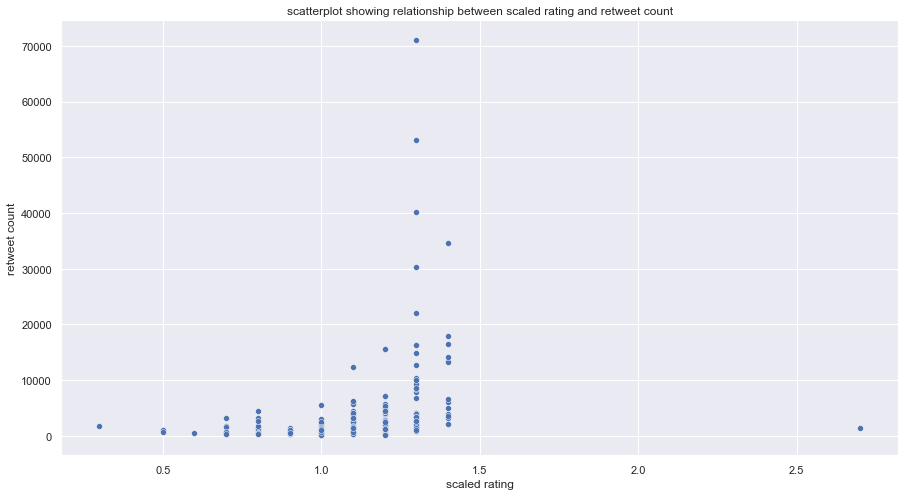

In [55]:
find_correlation(twitter_clean,'scaled_rating','retweet_count')

There is very little correlation between the ratings and retweet count

Rating vs Favorite Count

Correlation between scaled rating and favorite count: 0.34546298306793294


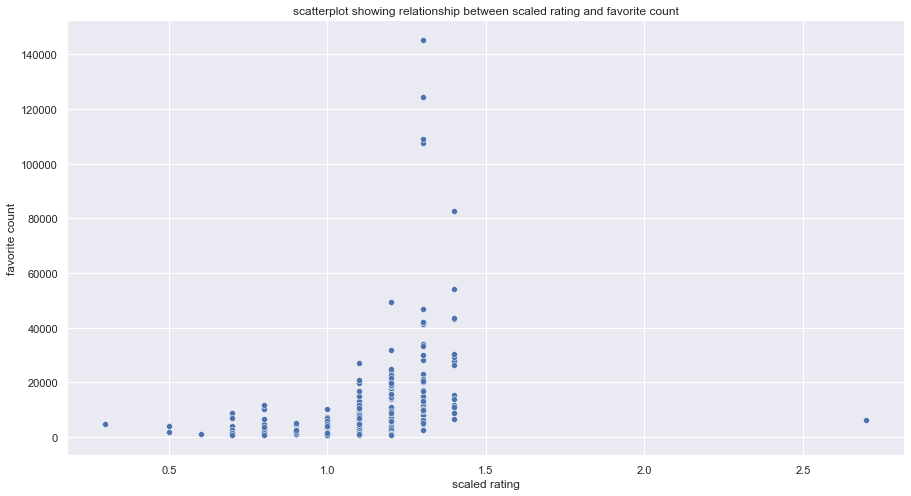

In [56]:
find_correlation(twitter_clean,'scaled_rating','favorite_count')

Just like the retweet count, there is little correlation between the ratings and favorite count

##### Which dog type has the highest retweet or favorite count?

Dog type vs Retweet Count

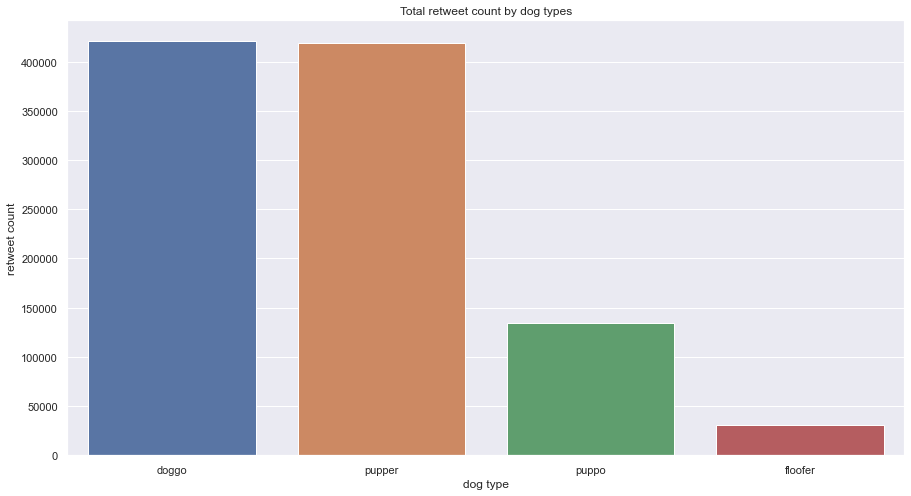

In [58]:
# join the twitter_master_archive data and the dog_type data together
compare_distributions('dog_type','retweet_count', twitter_clean)

Doggo has the highest retweet count, followed closely by Pupper

Dog Type vs Favorite Count

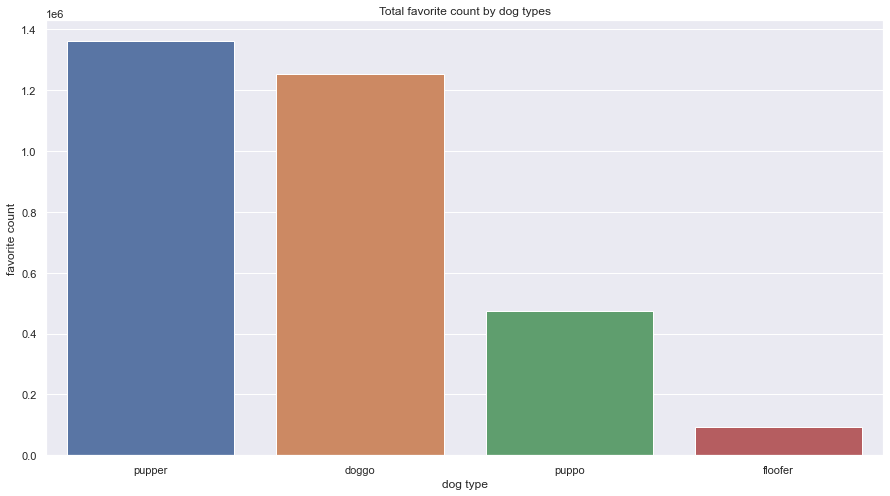

In [59]:
compare_distributions('dog_type','favorite_count', twitter_clean)

Pupper has the highest favorite count, followed closely by doggo

##### Which dog breed has the highest retweet or favorite count?

Dog Breed vs Retweet Count

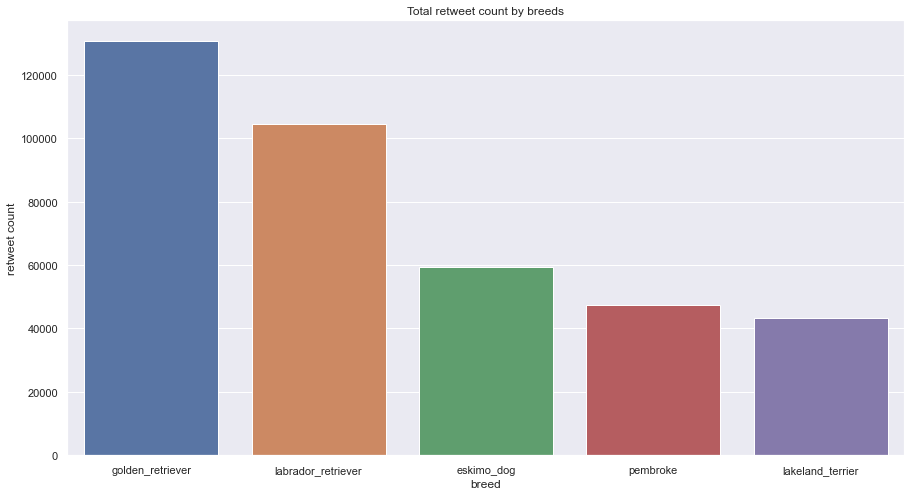

In [60]:
compare_distributions('breed','retweet_count', twitter_clean)

Dog Breed vs Favorite Count

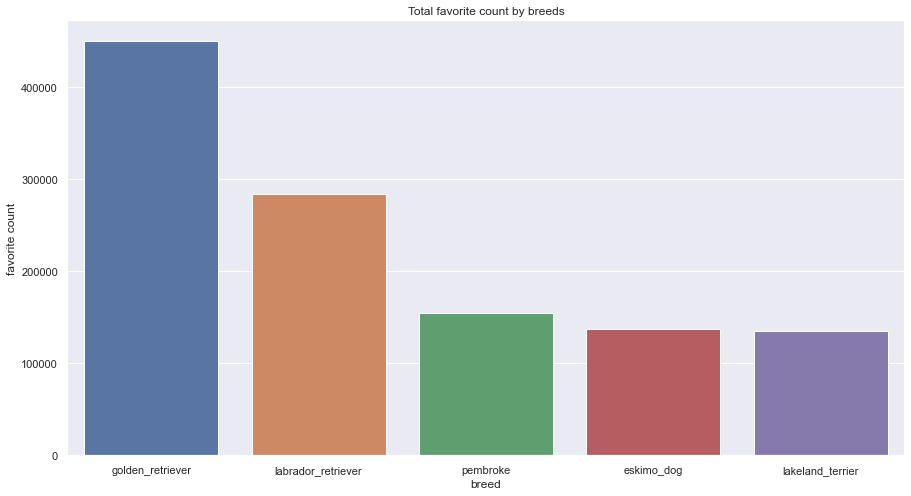

In [61]:
compare_distributions('breed','favorite_count', twitter_clean)

The distribution of retweet count and favorite count follow the same patterns for the dog breed. The golden retriever seems everyone's favorite.